<h1>Homework 3: Python programming</h1>
<h2>Predictive Analytics using Python (CIS432)</h2>
<h3>Simon Business School</h3>

__Instructor__: Yaron Shaposhnik




## Instructions

In this homework assignment, we will practice Python programming. We will keep working with the HELOC dataset, this time performing various analysis tasks that could not be directly performed using pandas. 

As part of this assignment, you will explore Python's
* Data types
* Data structures
* Flow control 
* Functions

As well as import packages and work with data files.

## Answer key

This assignment (as well as others) is graded by comparing your answers (that is, the variables and Python objects you create) with precomputed answers. This allows you to get immediate feedback in order to find your errors and correct them. The downside of this approach is that the grading code is strict and even slight deviations from the desired outputs could result in reduction of points. 

To make this learning experience more efficient, the objects that you are asked to generate are provided to you in the variable `ANSWER_KEY`. Questions may ask you to assign some value (like a number or object such as data frame) to some variable. 
For example, you might be asked to assign the variable `n_rows` with some value. To view the correct answer simply run the command `ANSWER_KEY['n_rows']`. 

Note that the answer key is provided to you __for debugging purposes only__. Using it in your final submission or hard-coding solutions __will be considered plagiarism__ and be reported to the student disciplinary committee.

In [201]:
# you may ignore this cell
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

if os.name == 'nt':
    ANSWER_KEY_FILE_NAME = "answer_key(win).p"
elif os.name == 'posix':
    ANSWER_KEY_FILE_NAME = "answer_key(unix).p"
else:
    raise Exception('The code was not tested on',os.name)

GENERATE_ANSWER_KEY=False

if GENERATE_ANSWER_KEY: 
    ANSWER_KEY = {} 
else:        
    with open(ANSWER_KEY_FILE_NAME, "rb") as f:
        ANSWER_KEY = pickle.load( f )             

In [202]:
# example for using answer key
if GENERATE_ANSWER_KEY==False: 
    print('this is the expected value of the variable "n_rows_df_models" (which you will be asked to compute)', ANSWER_KEY['n_rows_df_models'])

this is the expected value of the variable "n_rows_df_models" (which you will be asked to compute) 56


# Beginning of homework 3

### (q1)
The folder `preprocess_datasets` contains multiple variants of the same dataset, which differ by their column values (don't worry for now about how these values were created, this will be the focus of the next homework assignment).

Create a list called `preprocessed_datasets` that holds the names of the files in this folder. (Hint: use the OS shell command `ls` to list files)

In [203]:
preprocessed_datasets = "replace this string with your answer"
###
preprocessed_datasets = os.listdir("./preprocessed_datasets")
###


In [204]:
assert(sorted(preprocessed_datasets) == sorted(ANSWER_KEY['preprocessed_datasets']))

Let's look at the file names

In [205]:
for f in ANSWER_KEY['preprocessed_datasets']: # notice the syntax, how we iterate over a list of objects (strings), each time f takes a value from that list
    print(f)

heloc_dataset_v1(exc empty rows.).csv_pre(16,quantile).csv
heloc_dataset_v1(exc empty rows.).csv_pre(-1,asis).csv
heloc_dataset_v1(exc empty rows.).csv_pre(-1,manual_true).csv
heloc_dataset_v1(exc empty rows.).csv_pre(-1,w_binary4missing).csv
heloc_dataset_v1(exc empty rows.).csv_pre(2,quantile).csv
heloc_dataset_v1(exc empty rows.).csv_pre(4,quantile).csv
heloc_dataset_v1(exc empty rows.).csv_pre(8,quantile).csv


We observe that the file names follow a pattern: 

    heloc_dataset_v1(exc empty rows.).csv_pre[PREPROCESSING_METHOD].csv
    
where [PREPROCESSING_METHOD] could take values such as "(-1,asis)" or "(-1,manual_true)". Again, for now, don't worry about the meaning of these methods, only that each specifies a certain "preprocessing" method. The focus of this assignment is practicing Python programming.


Implement the function `file_name_to_preprocessing_method(s)` which takes a filename and extract the preprocessing method. For example, executing the command

    file_name_to_preprocessing_method("heloc_dataset_v1(exc empty rows.).csv_pre(-1,asis).csv")

should return the string "(-1,asis)"

Hint: you may find the string function `.find()` useful.

In [206]:
def file_name_to_preprocessing_method(s): 
    # execute certain string functions on s, assign the answer to the variable res, and finally return res
    # for a list of string functions, see, https://docs.python.org/3/library/string.html 
    res = "replace this string with your answer"
    position = s.find('csv_pre')
    if position >= 0:
        res = s[position+7:-4]
    else:
        res = 'not found'
    return(res)

In [207]:
### BEGIN TESTS
assert(file_name_to_preprocessing_method('heloc_dataset_v1(exc empty rows.).csv_pre(-1,asis).csv')=='(-1,asis)'), 'testing file_name_to_preprocessing_method'
assert(file_name_to_preprocessing_method('heloc_dataset_v1(exc empty rows.).csv_pre(-1,manual_true).csv')=='(-1,manual_true)'), 'testing file_name_to_preprocessing_method'
assert(file_name_to_preprocessing_method('heloc_dataset_v1(exc empty rows.).csv_pre(-1,w_binary4missing).csv')=='(-1,w_binary4missing)'), 'testing file_name_to_preprocessing_method'
assert(file_name_to_preprocessing_method('heloc_dataset_v1(exc empty rows.).csv_pre(16,quantile).csv')=='(16,quantile)'), 'testing file_name_to_preprocessing_method'
assert(file_name_to_preprocessing_method('heloc_dataset_v1(exc empty rows.).csv_pre(2,quantile).csv')=='(2,quantile)'), 'testing file_name_to_preprocessing_method'
assert(file_name_to_preprocessing_method('heloc_dataset_v1(exc empty rows.).csv_pre(4,quantile).csv')=='(4,quantile)'), 'testing file_name_to_preprocessing_method'
assert(file_name_to_preprocessing_method('heloc_dataset_v1(exc empty rows.).csv_pre(8,quantile).csv')=='(8,quantile)'), 'testing file_name_to_preprocessing_method'
### END TESTS

Implement the function `preprocessing_method_to_file_name(s)` which takes a preprocessing method `s` and returns the respective file name. For example, executing the command:

    preprocessing_method_to_file_name("(-1,asis)")

should return the string:

    "heloc_dataset_v1(exc empty rows.).csv_pre(-1,asis).csv"



In [208]:
# hint: the following command injects values into the string template defined below
i = 3       # an integer
f = 1.234   # a floating point number
b = True    # a boolean value
s = 'hello' # a string
x = '%d , %.1f , %r , %s'%(i,f,b,s) # the template injects an integer (%d), floating point number (%.1f - only 1 digit after the decimal point is shown), a boolean (%r this is actually more generic and would also work with other data types), and a string (%s)
print(x)    # print the newly created string based on the various data types

3 , 1.2 , True , hello


In [209]:
def preprocessing_method_to_file_name(s): 
    # execute certain string functions on s, assign the answer to the variable res, and finally return res
    # for a list of string functions, see, https://docs.python.org/3/library/string.html 
    res = "replace this string with your answer"
    for item in preprocessed_datasets:
         if s in item:
             res = item
             break
    return(res)

preprocessing_method_to_file_name('(-1,asis)')

'heloc_dataset_v1(exc empty rows.).csv_pre(-1,asis).csv'

In [210]:
### BEGIN TESTS
assert(preprocessing_method_to_file_name('(-1,asis)')=='heloc_dataset_v1(exc empty rows.).csv_pre(-1,asis).csv'), 'test preprocessing_method_to_file_name'
assert(preprocessing_method_to_file_name('(-1,manual_true)')=='heloc_dataset_v1(exc empty rows.).csv_pre(-1,manual_true).csv'), 'test preprocessing_method_to_file_name'
assert(preprocessing_method_to_file_name('(-1,w_binary4missing)')=='heloc_dataset_v1(exc empty rows.).csv_pre(-1,w_binary4missing).csv'), 'test preprocessing_method_to_file_name'
assert(preprocessing_method_to_file_name('(16,quantile)')=='heloc_dataset_v1(exc empty rows.).csv_pre(16,quantile).csv'), 'test preprocessing_method_to_file_name'
assert(preprocessing_method_to_file_name('(2,quantile)')=='heloc_dataset_v1(exc empty rows.).csv_pre(2,quantile).csv'), 'test preprocessing_method_to_file_name'
assert(preprocessing_method_to_file_name('(4,quantile)')=='heloc_dataset_v1(exc empty rows.).csv_pre(4,quantile).csv'), 'test preprocessing_method_to_file_name'
assert(preprocessing_method_to_file_name('(8,quantile)')=='heloc_dataset_v1(exc empty rows.).csv_pre(8,quantile).csv'), 'test preprocessing_method_to_file_name'
### END TESTS

This example is quite common in practice. We will often work with multiple files that share common structure and which differ by some attributes. For example, we could have multiple files for different days and we will need to automate the code that processes each file and extracts some information from the file name (e.g., the date). 

### (q2)

We do a similar exercise with the folder `models`. The folder contains a list of files, each corresponding to a preprocessing method (e.g., "(-1,asis)"), and a model (e.g., "(Log. Reg.)"). Again, don't worry about the what the model does or even mean. The key thing to understand here is that each file in `models` relates to a preprocessing method and a model, both of which are specified in the file name: 

    "heloc_dataset_v1(exc empty rows.).csv_pre(-1,asis).csv_model(Log. Reg.).csv"
    


Create a list called `models` that holds the names of the files in the folder `models`. (Hint: use the OS shell command `ls` to list files)

In [211]:
models = "replace this string with your answer"
###
models = os.listdir('./models')
###


In [212]:
assert(sorted(models) == sorted(ANSWER_KEY['models']))

Implement the function `file_name_to_preprocessing_method_and_model(s)` that takes a model file name and returns two values: the preprocessing method and the model. For example, running the command: 

    file_name_to_preprocessing_method_and_model("heloc_dataset_v1(exc empty rows.).csv_pre(-1,asis).csv_model(Log. Reg.).csv")
    
returns the tuple:

    ('(-1,asis)', '(Log. Reg.)')

In [213]:
def file_name_to_preprocessing_method_and_model(s): 
    # use string functions on s, assign the answer to the variables preprocessing and model, and finally return the tuple: (preprocessing, model)
    # for a list of string functions, see, https://docs.python.org/3/library/string.html 
    preprocessing = "replace this string with your answer"
    model = "replace this string with your answer"
    trash,pre,mo = s.split("csv_")
    
    #find preprocessing
    position = pre.find('pre')
    if position >= 0:
        preprocessing = pre[position+3:-1]
    else:
        preprocessing = 'not found'
    
    #find model
    position = mo.find('model')
    if position >= 0:
        model = mo[position+5:-4]
    else:
        model = 'not found'
    return(preprocessing, model)

file_name_to_preprocessing_method_and_model('heloc_dataset_v1(exc empty rows.).csv_pre(-1,asis).csv_model(Log. Reg.).csv')

('(-1,asis)', '(Log. Reg.)')

In [214]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


Now implement the opposite function `preprocessing_method_and_model_to_file_name(p,m)` that takes a preprocessing method `p` and a model `m` and returns the corresponding file name. For example, running the command: 

    preprocessing_method_and_model_to_file_name('(8,quantile)','(SVM (RBF))')
    
returns the string: 

    'heloc_dataset_v1(exc empty rows.).csv_pre(8,quantile).csv_model(SVM (RBF)).csv'
    
Note that both `p` and `m` are strings.

In [215]:
def preprocessing_method_and_model_to_file_name(p,m): 
    # execute certain string functions on s, assign the answer to the variable res, and finally return res
    # for a list of string functions, see, https://docs.python.org/3/library/string.html 
    res = "replace this string with your answer"
    for item in models:
         if p in item and m in item:
             res = item
             break
    return(res)

preprocessing_method_and_model_to_file_name('(8,quantile)','(SVM (RBF))')

'heloc_dataset_v1(exc empty rows.).csv_pre(8,quantile).csv_model(SVM (RBF)).csv'

In [216]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


### (q3)

Let's perform a quick sanity check on our data and check the dimensions of each data set. 

Create the dataframe `df_models` which contains a row per each file in the folder `models` and three columns labeled 'preprocessing', 'model', and 'file', which respectively hold the preprocessing method, the model, and the relative location of the file. 

The first two columns can be computed using the function `file_name_to_preprocessing_method_and_model(f)` you implemented earlier. To obtain the relative location of the file, you may use the function `join` as demonstrated below. 

Hint: to create a dataframe you may first create a list of dictionaries, each corresponding to a row in the data frame (and a file in the folder models). In each dictionary the key would be the column names and the dictionary value would be the respective value. 

In [217]:
# sample code for join
from os.path import join
model_file = 'heloc_dataset_v1(exc empty rows.).csv_pre(-1,asis).csv_model(AdaBoost).csv'
print(join('models',model_file)) # we simply concatenated the folder to the file name so that we could easily access the file when needed

models/heloc_dataset_v1(exc empty rows.).csv_pre(-1,asis).csv_model(AdaBoost).csv


The function `join` concatenates the folder location (this is a string) with the file name (another string). While this can be done using the '+' operator, in different operating systems different characters are used to describe paths (e.g., it could be '/' or '\\'). The function `join` takes care of this.

In [218]:
df_models = "replace this string with your answer"

#files
model_files = os.listdir('models/')
files = [join('models',model) for model in model_files]

#preprocessing and models
preprocessing = []
models = []
for f in files:
    preprocessing.append(file_name_to_preprocessing_method_and_model(f)[0])
    models.append(file_name_to_preprocessing_method_and_model(f)[1])

df_models = {
    'preprocessing' : preprocessing,
    'model' : models,
    'file' : files
}

df_models = pd.DataFrame(df_models)
df_models.head()



,preprocessing,model,file
0,"(-1,asis)",(SVM (RBF)),models/heloc_dataset_v1(exc empty rows.).csv_p...
1,"(4,quantile)",(KNN),models/heloc_dataset_v1(exc empty rows.).csv_p...
2,"(-1,w_binary4missing)",(CART),models/heloc_dataset_v1(exc empty rows.).csv_p...
3,"(16,quantile)",(SVM (RBF)),models/heloc_dataset_v1(exc empty rows.).csv_p...
4,"(16,quantile)",(KNN),models/heloc_dataset_v1(exc empty rows.).csv_p...


In [219]:
# Sample of the output
ANSWER_KEY['df_models'].head()

,preprocessing,model,file
0,"(16,quantile)",(AdaBoost),models/heloc_dataset_v1(exc empty rows.).csv_p...
1,"(16,quantile)",(CART),models/heloc_dataset_v1(exc empty rows.).csv_p...
2,"(16,quantile)",(KNN),models/heloc_dataset_v1(exc empty rows.).csv_p...
3,"(16,quantile)",(Log. Reg.),models/heloc_dataset_v1(exc empty rows.).csv_p...
4,"(16,quantile)",(RF),models/heloc_dataset_v1(exc empty rows.).csv_p...


In [220]:
### BEGIN TEST (DO NOT REMOVE CELL)
sol = ANSWER_KEY['df_models'].sort_values(by='file',ignore_index=True)
diff = sol.compare(df_models.sort_values(by='file',ignore_index=True), keep_equal=False, align_axis=0)
assert(len(diff)==0), 'testing df_models'
### END TEST 

Create the following variables and assign to them the indicated values: 
- `n_rows_df_models`: the number of rows in df_models
- `n_cols_df_models`: the number of columns in df_models
- `num_preprocessing`: the number of different preprocessing methods
- `num_models`: the number of different models
- `models_list`: the list of models that appear in the files in the folder `models`; sort the list using the command `sorted`

Hint: you may use the series function `.unique()` to return the unique values of a certain column. (see also, https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.unique.html)

In [221]:
# sample code
sorted([1,10,3])

[1, 3, 10]

In [222]:
n_rows_df_models = "replace this string with your answer"
n_cols_df_models = "replace this string with your answer"
num_preprocessing = "replace this string with your answer"
num_models = "replace this string with your answer"
models_list = "replace this string with your answer"

# number of rows
n_rows_df_models = len(df_models)

# number of cols
n_cols_df_models = len(df_models.columns)

#number of different preprocessing methods
num_preprocessing = len(pd.unique(df_models['preprocessing']))

#number of models
num_models = len(pd.unique(df_models['model']))

#model lists
models_list = sorted(pd.unique(df_models['model']))


In [223]:
### BEGIN TEST (DO NOT REMOVE CELL)
assert(ANSWER_KEY['n_rows_df_models']==n_rows_df_models)
assert(ANSWER_KEY['n_cols_df_models']==n_cols_df_models)
assert(ANSWER_KEY['num_preprocessing']==num_preprocessing)
assert(ANSWER_KEY['num_models']==num_models)
assert(sorted(ANSWER_KEY['models_list'])==sorted(models_list))
### END TEST 

Let's examine the resulting dataframe:

In [224]:
print('The number of rows in df_models:', ANSWER_KEY['n_rows_df_models'])
print('The number of columns in df_models:', ANSWER_KEY['n_cols_df_models'])
print('The number of different preprocessing methods:', ANSWER_KEY['num_preprocessing'])
print('The number of different models:', ANSWER_KEY['num_models'])
print('The list of models:', ANSWER_KEY['models_list'])

The number of rows in df_models: 56
The number of columns in df_models: 3
The number of different preprocessing methods: 7
The number of different models: 8
The list of models: ['(AdaBoost)', '(CART)', '(KNN)', '(Log. Reg.)', '(RF)', '(SVM (Linear))', '(SVM (Poly))', '(SVM (RBF))']


Let's add a new column to `df_models` which would hold the dimensions (shape) of the data frame in each file. Call the new column `shape`. Each element in this column should be a tuple with two integers indicating the number of rows and columns in the corresponding file.

Hint: you may use the command `.apply()` to apply a function to each row (or column) of a data frame.

In [225]:
# Sample code (1): for simplicity, we will apply a function to a smaller dataframe that only contains the first 3 rows of df_models 
df_models.head(3)

,preprocessing,model,file
0,"(-1,asis)",(SVM (RBF)),models/heloc_dataset_v1(exc empty rows.).csv_p...
1,"(4,quantile)",(KNN),models/heloc_dataset_v1(exc empty rows.).csv_p...
2,"(-1,w_binary4missing)",(CART),models/heloc_dataset_v1(exc empty rows.).csv_p...


In [226]:
# Sample code (2)

def some_function_to_apply_to_each_row(row):
    # The function we define here counts the number of characters in the column 'model' (not a particularly interesting function, just an example)
    return(len(row['model']))

# The function apply returns the same number of elements as the number of rows in the dataframe to which it was applied
df_models.head(3).apply(some_function_to_apply_to_each_row, axis=1) # the axis parameter means that we apply the function to each row (rather than to each column)

0    11
1     5
2     6
dtype: int64

In [227]:
# Sample code (3): an alternative way of defining the same function using "anonymous functions"
some_function_to_apply_to_each_row = lambda row:len(row['model']) # here we define the same function more compactly

df_models.head(3).apply(some_function_to_apply_to_each_row, axis=1) 

0    11
1     5
2     6
dtype: int64

In [228]:
# Sample code (4): an even more compact way to do it
df_models.head(3).apply(lambda row:len(row['model']), axis=1) 

0    11
1     5
2     6
dtype: int64

In [229]:
# write here code that adds the new column to df_models (running it may take a while as you might read each of the files in the folder models)

#calculate num of rows and columns
def calculate_rows_and_columns(row):
    df = pd.read_csv(row['file'])
    n_rows = len(df)
    n_cols = len(df.columns)
    return (n_rows,n_cols)

#add new column
shape = df_models.apply(calculate_rows_and_columns,axis=1)
df_models['shape'] = shape
df_models.head()


,preprocessing,model,file,shape
0,"(-1,asis)",(SVM (RBF)),models/heloc_dataset_v1(exc empty rows.).csv_p...,"(9871, 24)"
1,"(4,quantile)",(KNN),models/heloc_dataset_v1(exc empty rows.).csv_p...,"(9871, 105)"
2,"(-1,w_binary4missing)",(CART),models/heloc_dataset_v1(exc empty rows.).csv_p...,"(9871, 36)"
3,"(16,quantile)",(SVM (RBF)),models/heloc_dataset_v1(exc empty rows.).csv_p...,"(9871, 381)"
4,"(16,quantile)",(KNN),models/heloc_dataset_v1(exc empty rows.).csv_p...,"(9871, 381)"


In [230]:
# example of the output
ANSWER_KEY['df_models_update1'].head(3)

,preprocessing,model,file,shape
0,"(16,quantile)",(AdaBoost),models/heloc_dataset_v1(exc empty rows.).csv_p...,"(9871, 381)"
1,"(16,quantile)",(CART),models/heloc_dataset_v1(exc empty rows.).csv_p...,"(9871, 381)"
2,"(16,quantile)",(KNN),models/heloc_dataset_v1(exc empty rows.).csv_p...,"(9871, 381)"


In [231]:
### BEGIN TEST (DO NOT REMOVE CELL)
sol = ANSWER_KEY['df_models_update1'].sort_values(by='file',ignore_index=True)
diff = sol.compare(df_models.sort_values(by='file',ignore_index=True), keep_equal=False, align_axis=0)
assert(len(diff)==0), 'testing df_models_update1'
### END TEST 

Use the function `.apply()` to add two new columns called `n_rows` and `n_cols`, respectively holding the number of rows and columns in each row. 

In [232]:
# write here code that adds the new column to df_models
df_models['n_rows'] = df_models.apply(lambda row: len(pd.read_csv(row['file'])),axis=1)
df_models['n_cols'] = df_models.apply(lambda row: len(pd.read_csv(row['file']).columns),axis=1)
df_models.head()


,preprocessing,model,file,shape,n_rows,n_cols
0,"(-1,asis)",(SVM (RBF)),models/heloc_dataset_v1(exc empty rows.).csv_p...,"(9871, 24)",9871,24
1,"(4,quantile)",(KNN),models/heloc_dataset_v1(exc empty rows.).csv_p...,"(9871, 105)",9871,105
2,"(-1,w_binary4missing)",(CART),models/heloc_dataset_v1(exc empty rows.).csv_p...,"(9871, 36)",9871,36
3,"(16,quantile)",(SVM (RBF)),models/heloc_dataset_v1(exc empty rows.).csv_p...,"(9871, 381)",9871,381
4,"(16,quantile)",(KNN),models/heloc_dataset_v1(exc empty rows.).csv_p...,"(9871, 381)",9871,381


In [233]:
# example of the output
ANSWER_KEY['df_models_update2'].head(3)

,preprocessing,model,file,shape,n_rows,n_cols
0,"(16,quantile)",(AdaBoost),models/heloc_dataset_v1(exc empty rows.).csv_p...,"(9871, 381)",9871,381
1,"(16,quantile)",(CART),models/heloc_dataset_v1(exc empty rows.).csv_p...,"(9871, 381)",9871,381
2,"(16,quantile)",(KNN),models/heloc_dataset_v1(exc empty rows.).csv_p...,"(9871, 381)",9871,381


In [234]:
### BEGIN TEST (DO NOT REMOVE CELL)
sol = ANSWER_KEY['df_models_update2'].sort_values(by='file',ignore_index=True)
diff = sol.compare(df_models.sort_values(by='file',ignore_index=True), keep_equal=False, align_axis=0)
assert(len(diff)==0), 'testing df_models_update2'
### END TEST 

Let's look at the number of rows and columns in each file:

In [235]:
ANSWER_KEY['df_models_update2'].describe()

,n_rows,n_cols
count,56.0,56.000000
mean,9871.0,130.285714
std,0.0,116.698479
min,9871.0,24.000000
25%,9871.0,36.000000
50%,9871.0,105.000000
75%,9871.0,197.000000
max,9871.0,381.000000


The number of rows is always 9871 and the number of columns varies between 24 to 381 (this depends on the preprocessing method)

### (q4) 

The files in the folder models contain the output of predictive models trained on the same dataset that was preprocessed in a certain ways. For example, the file 

    heloc_dataset_v1(exc empty rows.).csv_pre(-1,asis).csv_model(AdaBoost).csv
    
contains the dataset that was preprocessed using the method `(-1,asis)` (whatever this means) and to which the model `(AdaBoost)` (whatever this means) was applied. The column `RiskPerformance` in that datafile contains the prediction of this model which was trained on the particular preprocessed data. 

In what follows, we compare the predictions made by each of these models and preprocessing methods. 

Key takeaway: each files in the folder model contains one columns that is of interest to us called `RiskPerformance`. This column always holds 9871 values and in this question we will compare the columns corresponding to the different files.

Create the dataframe `df_predictions` which holds the columns of `df_models` and additional 9871 columns, one per each prediction made by the respective model and preprocessing method for the specific observation. 

In [236]:
df_predictions = "replace this string with your answer"

#find prediction in every file
def get_prediction(row):
    df = pd.read_csv(row['file'])
    res = df['RiskPerformance']
    return res

#combine all predictions
predictions = df_models.apply(get_prediction,axis=1)
df_predictions = df_models.join(predictions)
df_predictions.head()

,preprocessing,model,file,shape,n_rows,n_cols,0,1,2,3,...,9861,9862,9863,9864,9865,9866,9867,9868,9869,9870
0,"(-1,asis)",(SVM (RBF)),models/heloc_dataset_v1(exc empty rows.).csv_p...,"(9871, 24)",9871,24,Bad,Bad,Bad,Bad,...,Bad,Good,Good,Good,Bad,Good,Bad,Good,Good,Bad
1,"(4,quantile)",(KNN),models/heloc_dataset_v1(exc empty rows.).csv_p...,"(9871, 105)",9871,105,Bad,Bad,Bad,Bad,...,Bad,Good,Good,Good,Bad,Good,Bad,Good,Good,Bad
2,"(-1,w_binary4missing)",(CART),models/heloc_dataset_v1(exc empty rows.).csv_p...,"(9871, 36)",9871,36,Bad,Bad,Bad,Bad,...,Bad,Good,Good,Good,Good,Bad,Bad,Bad,Bad,Bad
3,"(16,quantile)",(SVM (RBF)),models/heloc_dataset_v1(exc empty rows.).csv_p...,"(9871, 381)",9871,381,Bad,Bad,Bad,Bad,...,Bad,Good,Good,Good,Bad,Good,Bad,Good,Good,Bad
4,"(16,quantile)",(KNN),models/heloc_dataset_v1(exc empty rows.).csv_p...,"(9871, 381)",9871,381,Bad,Bad,Bad,Bad,...,Bad,Good,Good,Good,Bad,Good,Bad,Bad,Good,Bad


In [237]:
# Example of the first 5 rows of the output
ANSWER_KEY['df_predictions'].head()

,preprocessing,model,file,shape,n_rows,n_cols,0,1,2,3,...,9861,9862,9863,9864,9865,9866,9867,9868,9869,9870
0,"(16,quantile)",(AdaBoost),models/heloc_dataset_v1(exc empty rows.).csv_p...,"(9871, 381)",9871,381,Bad,Bad,Bad,Bad,...,Bad,Good,Good,Good,Good,Good,Bad,Good,Good,Bad
1,"(16,quantile)",(CART),models/heloc_dataset_v1(exc empty rows.).csv_p...,"(9871, 381)",9871,381,Bad,Bad,Bad,Bad,...,Bad,Good,Good,Good,Good,Bad,Bad,Good,Good,Bad
2,"(16,quantile)",(KNN),models/heloc_dataset_v1(exc empty rows.).csv_p...,"(9871, 381)",9871,381,Bad,Bad,Bad,Bad,...,Bad,Good,Good,Good,Bad,Good,Bad,Bad,Good,Bad
3,"(16,quantile)",(Log. Reg.),models/heloc_dataset_v1(exc empty rows.).csv_p...,"(9871, 381)",9871,381,Bad,Bad,Bad,Bad,...,Bad,Good,Good,Good,Good,Good,Bad,Good,Good,Bad
4,"(16,quantile)",(RF),models/heloc_dataset_v1(exc empty rows.).csv_p...,"(9871, 381)",9871,381,Bad,Bad,Bad,Bad,...,Bad,Good,Good,Good,Bad,Good,Bad,Bad,Good,Bad


(we basically added 9871 columns to each row using values from the respective file) 

To emphasize that the data in `df_predictions` comes from the files specified in the column `file`, below we print the prediction from the two different sources.

In [238]:
# Here we print predictions from the file 
print('File name:', df_models.iloc[0].loc['file'])
print('Prediction for the first 6 customers')
pd.read_csv(df_models.iloc[0].loc['file'])['RiskPerformance'].head(6)

File name: models/heloc_dataset_v1(exc empty rows.).csv_pre(-1,asis).csv_model(SVM (RBF)).csv
Prediction for the first 6 customers


0     Bad
1     Bad
2     Bad
3     Bad
4    Good
5     Bad
Name: RiskPerformance, dtype: object

In [239]:
# Here we print the first row of df_predictions (only first 12 columns out of ~9800)
ANSWER_KEY['df_predictions'].iloc[[0],:12]

,preprocessing,model,file,shape,n_rows,n_cols,0,1,2,3,4,5
0,"(16,quantile)",(AdaBoost),models/heloc_dataset_v1(exc empty rows.).csv_p...,"(9871, 381)",9871,381,Bad,Bad,Bad,Bad,Good,Bad


In [240]:
### BEGIN TEST (DO NOT REMOVE CELL)
sol = ANSWER_KEY['df_predictions'].sort_values(by='file',ignore_index=True)
diff = sol.compare(df_predictions.sort_values(by='file',ignore_index=True), keep_equal=False, align_axis=0)
assert(len(diff)==0), 'testing df_predictions'
### END TEST 

Let's focus on one preprocessing method: `(-1,asis)`. Set the variable `df_predictions_one_method` to hold only the rows in `df_predictions` where the preprocessing method is `(-1,asis)`.

In [241]:
df_predictions_one_method = "replace this string with your answer"
df_predictions_one_method = df_predictions[df_predictions['preprocessing'] == '(-1,asis)']
df_predictions_one_method

,preprocessing,model,file,shape,n_rows,n_cols,0,1,2,3,...,9861,9862,9863,9864,9865,9866,9867,9868,9869,9870
0,"(-1,asis)",(SVM (RBF)),models/heloc_dataset_v1(exc empty rows.).csv_p...,"(9871, 24)",9871,24,Bad,Bad,Bad,Bad,...,Bad,Good,Good,Good,Bad,Good,Bad,Good,Good,Bad
11,"(-1,asis)",(KNN),models/heloc_dataset_v1(exc empty rows.).csv_p...,"(9871, 24)",9871,24,Bad,Bad,Bad,Bad,...,Bad,Good,Good,Good,Bad,Good,Bad,Bad,Good,Bad
23,"(-1,asis)",(AdaBoost),models/heloc_dataset_v1(exc empty rows.).csv_p...,"(9871, 24)",9871,24,Bad,Bad,Bad,Bad,...,Bad,Good,Good,Good,Good,Good,Bad,Good,Good,Bad
32,"(-1,asis)",(SVM (Linear)),models/heloc_dataset_v1(exc empty rows.).csv_p...,"(9871, 24)",9871,24,Bad,Bad,Bad,Bad,...,Bad,Good,Good,Good,Good,Good,Bad,Bad,Good,Bad
38,"(-1,asis)",(SVM (Poly)),models/heloc_dataset_v1(exc empty rows.).csv_p...,"(9871, 24)",9871,24,Bad,Bad,Bad,Bad,...,Bad,Good,Good,Good,Bad,Good,Bad,Good,Good,Bad
41,"(-1,asis)",(Log. Reg.),models/heloc_dataset_v1(exc empty rows.).csv_p...,"(9871, 24)",9871,24,Bad,Bad,Bad,Bad,...,Bad,Good,Good,Good,Good,Good,Bad,Bad,Good,Bad
46,"(-1,asis)",(CART),models/heloc_dataset_v1(exc empty rows.).csv_p...,"(9871, 24)",9871,24,Bad,Bad,Bad,Bad,...,Bad,Good,Good,Good,Good,Good,Bad,Good,Good,Bad
48,"(-1,asis)",(RF),models/heloc_dataset_v1(exc empty rows.).csv_p...,"(9871, 24)",9871,24,Bad,Bad,Bad,Bad,...,Bad,Good,Good,Good,Good,Good,Bad,Bad,Good,Bad


In [242]:
### BEGIN TEST (DO NOT REMOVE CELL)
sol = ANSWER_KEY['df_predictions_one_method'].sort_values(by='file',ignore_index=True)
diff = sol.compare(df_predictions_one_method.sort_values(by='file',ignore_index=True), keep_equal=False, align_axis=0)
assert(len(diff)==0), 'testing df_predictions_one_method'
### END TEST 

In [243]:
# output
ANSWER_KEY['df_predictions_one_method']

,preprocessing,model,file,shape,n_rows,n_cols,0,1,2,3,...,9861,9862,9863,9864,9865,9866,9867,9868,9869,9870
8,"(-1,asis)",(AdaBoost),models/heloc_dataset_v1(exc empty rows.).csv_p...,"(9871, 24)",9871,24,Bad,Bad,Bad,Bad,...,Bad,Good,Good,Good,Good,Good,Bad,Good,Good,Bad
9,"(-1,asis)",(CART),models/heloc_dataset_v1(exc empty rows.).csv_p...,"(9871, 24)",9871,24,Bad,Bad,Bad,Bad,...,Bad,Good,Good,Good,Good,Good,Bad,Good,Good,Bad
10,"(-1,asis)",(KNN),models/heloc_dataset_v1(exc empty rows.).csv_p...,"(9871, 24)",9871,24,Bad,Bad,Bad,Bad,...,Bad,Good,Good,Good,Bad,Good,Bad,Bad,Good,Bad
11,"(-1,asis)",(Log. Reg.),models/heloc_dataset_v1(exc empty rows.).csv_p...,"(9871, 24)",9871,24,Bad,Bad,Bad,Bad,...,Bad,Good,Good,Good,Good,Good,Bad,Bad,Good,Bad
12,"(-1,asis)",(RF),models/heloc_dataset_v1(exc empty rows.).csv_p...,"(9871, 24)",9871,24,Bad,Bad,Bad,Bad,...,Bad,Good,Good,Good,Good,Good,Bad,Bad,Good,Bad
13,"(-1,asis)",(SVM (Linear)),models/heloc_dataset_v1(exc empty rows.).csv_p...,"(9871, 24)",9871,24,Bad,Bad,Bad,Bad,...,Bad,Good,Good,Good,Good,Good,Bad,Bad,Good,Bad
14,"(-1,asis)",(SVM (Poly)),models/heloc_dataset_v1(exc empty rows.).csv_p...,"(9871, 24)",9871,24,Bad,Bad,Bad,Bad,...,Bad,Good,Good,Good,Bad,Good,Bad,Good,Good,Bad
15,"(-1,asis)",(SVM (RBF)),models/heloc_dataset_v1(exc empty rows.).csv_p...,"(9871, 24)",9871,24,Bad,Bad,Bad,Bad,...,Bad,Good,Good,Good,Bad,Good,Bad,Good,Good,Bad


Create the matrix `pairwise_comparison` of size 8x8 where the value of the matrix element (i,j) is the similarity between the predictions in rows i and j. 

For example, suppose that in row 1 the prediction were [Bad,Bad,Good,Good] and that in row 2 the prediction were [Bad, Bad, Good, Bad]. These predictions coincide in 75% of cases (in all but the 4th prediction). In this case, we would like the matrix element (1,2) to be equal to 0.75 (as well as the value of element (2,1)).

Hints: 
- you may iterate over rows and columns using the for loop
- you may compare two vectors easily by converting them to numpy arrays
- if you convert the compared values (booleans) to 0's and 1's, the average (np.average) would return the similarity
- the matrix is symmetric and you can save on running time using an if-else statement that checks if you're below or above the diagonal (if j>i we can use the similarity of i vs. j instead of recomputing it for j vs. i)

In [244]:
# sample code
print('this is what happens when we just compare lists:', ['Dog','Cat','Cat'] == ['Dog','Cat','Dog'])
comparison = np.array(['Dog','Cat','Cat']) == np.array(['Dog','Cat','Dog'])
print('here we compare numpy arrays:', comparison)
print('here we convert the comparison to integers:',comparison.astype(int))
print('similarity', np.average(comparison),'\n')
print('create a matrix of 0\'s\n',np.zeros((2,2)))

this is what happens when we just compare lists: False
here we compare numpy arrays: [ True  True False]
here we convert the comparison to integers: [1 1 0]
similarity 0.6666666666666666 

create a matrix of 0's
 [[0. 0.]
 [0. 0.]]


__For consistency with the automated solution, sort the dataframe `df_predictions_one_method` prior to generating the matrix according the file column by running the function:__

    df_predictions_one_method = df_predictions_one_method.sort_values(by='file',ignore_index=True)

In [245]:
pairwise_comparison =  "replace this string with your answer"

#sort
df_predictions_one_method = df_predictions_one_method.sort_values(by='file',ignore_index=True)

#intiate matrix
pairwise_comparison = np.zeros((len(df_predictions_one_method),len(df_predictions_one_method)))

#fill in matrix
for i in range(len(df_predictions_one_method)):
    for j in range(len(df_predictions_one_method)):
        comparison = df_predictions_one_method.iloc[i,7:] == df_predictions_one_method.iloc[j,7:]
        pairwise_comparison[i][j] = np.average(comparison).round(2)

pairwise_comparison



array([[1.  , 0.91, 0.86, 0.93, 0.83, 0.93, 0.93, 0.92],
       [0.91, 1.  , 0.83, 0.87, 0.8 , 0.88, 0.88, 0.87],
       [0.86, 0.83, 1.  , 0.87, 0.82, 0.87, 0.88, 0.89],
       [0.93, 0.87, 0.87, 1.  , 0.82, 0.98, 0.95, 0.93],
       [0.83, 0.8 , 0.82, 0.82, 1.  , 0.82, 0.83, 0.85],
       [0.93, 0.88, 0.87, 0.98, 0.82, 1.  , 0.95, 0.93],
       [0.93, 0.88, 0.88, 0.95, 0.83, 0.95, 1.  , 0.96],
       [0.92, 0.87, 0.89, 0.93, 0.85, 0.93, 0.96, 1.  ]])

In [246]:
# sample output
print(ANSWER_KEY['pairwise_comparison'].round(2))

[[1.   0.91 0.86 0.93 0.83 0.93 0.93 0.92]
 [0.91 1.   0.83 0.87 0.8  0.88 0.88 0.87]
 [0.86 0.83 1.   0.87 0.82 0.87 0.88 0.89]
 [0.93 0.87 0.87 1.   0.82 0.98 0.95 0.93]
 [0.83 0.8  0.82 0.82 1.   0.82 0.83 0.85]
 [0.93 0.88 0.87 0.98 0.82 1.   0.95 0.93]
 [0.93 0.88 0.88 0.95 0.83 0.95 1.   0.96]
 [0.92 0.87 0.89 0.93 0.85 0.93 0.96 1.  ]]


In [247]:
### BEGIN TEST (DO NOT REMOVE CELL)
assert(np.equal(ANSWER_KEY['pairwise_comparison'].round(2), pairwise_comparison.round(2)).all()), 'testing pairwise_comparison'
### END TEST 

Create the data frame `df_pairwise_comparison` which would hold the same values as `pairwise_comparison` but where the indexes and column names describe the models.

In [248]:
df_pairwise_comparison =  "replace this string with your answer"

df_pairwise_comparison = pd.DataFrame(pairwise_comparison,index=df_predictions_one_method['model'], columns=df_predictions_one_method['model'])
df_pairwise_comparison

model,(AdaBoost),(CART),(KNN),(Log. Reg.),(RF),(SVM (Linear)),(SVM (Poly)),(SVM (RBF))
model,,,,,,,,
(AdaBoost),1.00,0.91,0.86,0.93,0.83,0.93,0.93,0.92
(CART),0.91,1.00,0.83,0.87,0.80,0.88,0.88,0.87
(KNN),0.86,0.83,1.00,0.87,0.82,0.87,0.88,0.89
(Log. Reg.),0.93,0.87,0.87,1.00,0.82,0.98,0.95,0.93
(RF),0.83,0.80,0.82,0.82,1.00,0.82,0.83,0.85
(SVM (Linear)),0.93,0.88,0.87,0.98,0.82,1.00,0.95,0.93
(SVM (Poly)),0.93,0.88,0.88,0.95,0.83,0.95,1.00,0.96
(SVM (RBF)),0.92,0.87,0.89,0.93,0.85,0.93,0.96,1.00


In [249]:
# expected output
ANSWER_KEY['df_pairwise_comparison'].round(2)

model,(AdaBoost),(CART),(KNN),(Log. Reg.),(RF),(SVM (Linear)),(SVM (Poly)),(SVM (RBF))
model,,,,,,,,
(AdaBoost),1.00,0.91,0.86,0.93,0.83,0.93,0.93,0.92
(CART),0.91,1.00,0.83,0.87,0.80,0.88,0.88,0.87
(KNN),0.86,0.83,1.00,0.87,0.82,0.87,0.88,0.89
(Log. Reg.),0.93,0.87,0.87,1.00,0.82,0.98,0.95,0.93
(RF),0.83,0.80,0.82,0.82,1.00,0.82,0.83,0.85
(SVM (Linear)),0.93,0.88,0.87,0.98,0.82,1.00,0.95,0.93
(SVM (Poly)),0.93,0.88,0.88,0.95,0.83,0.95,1.00,0.96
(SVM (RBF)),0.92,0.87,0.89,0.93,0.85,0.93,0.96,1.00


In [250]:
# example of the first row and column indexes 
print(ANSWER_KEY['df_pairwise_comparison'].index.values[0])
print(ANSWER_KEY['df_pairwise_comparison'].columns.values[0])

(AdaBoost)
(AdaBoost)


In [251]:
# observe that the data type of the indexes and column names are strings 
# note that if in your dataframes these types are different the test will fail
print(type(ANSWER_KEY['df_pairwise_comparison'].index.values[0]))
print(type(ANSWER_KEY['df_pairwise_comparison'].columns.values[0]))

<class 'str'>
<class 'str'>


In [252]:
### BEGIN TEST (DO NOT REMOVE CELL)
sol = ANSWER_KEY['df_pairwise_comparison'].round(2)
diff = sol.compare(df_pairwise_comparison.round(2), keep_equal=False, align_axis=0)
assert(len(diff)==0), 'testing df_pairwise_comparison'
### END TEST 

We can visualize the dataframe `df_pairwise_comparison` using a heatmap:

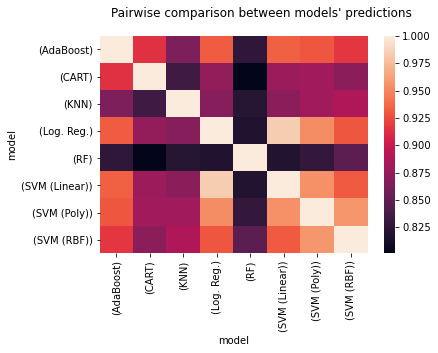

In [253]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(6, 4))
ax = sns.heatmap(ANSWER_KEY['df_pairwise_comparison']) # notice how compact the code is due to the indexes and column names of the dataframe
fig.suptitle('Pairwise comparison between models\' predictions');

Comparing the predictions that different models make on the same data, we observe that overall the models operate quite differently. The closest models are Logistic regression (Log. Reg.) and Linear SVM, both of which are linear models (we will discuss these models in detail later in the course).
   
    
    

### (q5)
Finally, let's export the pairwise comparison to files for future use. First as a csv file and then as a json file. In both case, round the values in the dataframe `df_pairwise_comparison` to two digits after the decimal point using the dataframe function `round()`.

Use the dataframe function `to_csv` to export the dataframe `df_pairwise_comparison` as CSV to the file `df_pairwise_comparison.csv`. 

In [254]:
#round
df_pairwise_comparison.apply(lambda row:row.round(2), axis = 1)

#export to csv
df_pairwise_comparison.to_csv('df_pairwise_comparison.csv')

In [255]:
### BEGIN TEST (DO NOT REMOVE CELL)
sol = df_pairwise_comparison.round(2)
diff = sol.compare(pd.read_csv('df_pairwise_comparison.csv', index_col=0).round(2), keep_equal=False, align_axis=0)
assert(len(diff)==0), 'testing csv export'
### END TEST 

The image below shows how the csv file looks like:

<img src="csv.png">

Use the dataframe function `to_json` to export the dataframe `df_pairwise_comparison` as JSON the file `df_pairwise_comparison.json` (use the parameter `orient="split"` and `indent=2`).


In [256]:
#export to json
df_pairwise_comparison.to_json('df_pairwise_comparison.json',orient='split',indent=2)


The image below shows how the json file looks like: ('dictionary' with 'columns' holding the list of column names, 'index' holding the list of indexes, and 'data' which holds a matrix represented as a list of lists; the first list holds the values in the first row, the second list holds values in the second row, etc.)

<img src="json.png">

In [257]:
### BEGIN TEST (DO NOT REMOVE CELL)
sol = df_pairwise_comparison.round(2)
diff = sol.compare(pd.read_json('df_pairwise_comparison.json', orient="split").round(2), keep_equal=False, align_axis=0)
assert(len(diff)==0), 'testing csv export'
### END TEST 

# Summary


In this homework assignment, we practiced Python programming. Working with the HELOC dataset, we automated the loading of data files, extracted information from their names, and compared their content. We explored various data types, data structures, flow control methods and wrote functions. The data files we worked with contains information about preprocessing methods and models. In the next assignment, we will explore these at a greater depth. 

In [258]:
### BEGIN TEST (DO NOT REMOVE CELL)
if GENERATE_ANSWER_KEY: 
    with open(ANSWER_KEY_FILE_NAME, "wb") as f:
        pickle.dump( ANSWER_KEY,  f)
### END TEST 